In [65]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import TwoSlopeNorm

# Read data

In [66]:
dir_name = f"fit_models_py_raraki_2023-11-20_sigmoid_conus"
# dir_name = f"fit_models_py_raraki_2023-10-26_CONUS"
data_dir = "/home/raraki/waves/projects/smap-drydown/data"
datarod_dir = "datarods"
anc_dir = "SMAP_L1_L3_ANC_STATIC"
anc_file = "anc_info.csv"
IGBPclass_file = "IGBP_class.csv"
ai_file = "AridityIndex_from_datarods.csv"

In [67]:
input_file = rf"/home/raraki/waves/projects/smap-drydown/output/{dir_name}/all_results.csv"
_df = pd.read_csv(input_file)
coord_info_file = "/home/raraki/waves/projects/smap-drydown/data/datarods/coord_info.csv"
coord_info = pd.read_csv(coord_info_file)
df = _df.merge(coord_info, on=['EASE_row_index', 'EASE_column_index'], how='left')
print(len(df))
df.head()

111672


,Unnamed: 0,EASE_row_index,EASE_column_index,event_start,event_end,time,sm,min_sm,max_sm,pet,...,q_r_squared,q_y_opt,sigmoid_s50,sigmoid_k,sigmoid_ETmax,sigmoid_r_squared,sigmoid_y_opt,id,latitude,longitude
0,0,49,178,2015-07-06,2015-07-16,[ 0 1 2 4 5 7 8 9 10],[0.2700876 0.23557265 0.21525141 0.1968715 0...,0.075926,0.328024,4.546666,...,0.977789,"[0.2664033584037942, 0.24043752728566048, 0.22...",0.580531,16.445286,6.579819,0.980484,"[0.2700876, 0.2395236265700932, 0.219272312697...",47414,49.00465,-113.34025
1,1,49,178,2015-07-18,2015-07-22,[0 1 3 4],[0.25743487 0.21624508 0.23729874 0.21127926],0.075926,0.328024,4.690045,...,0.630340,"[0.2571348427186617, 0.2284782425687995, 0.219...",0.682746,10.003269,0.980868,0.245067,"[0.257434865, 0.2445556929344491, 0.2228690147...",47414,49.00465,-113.34025
2,2,49,178,2016-10-16,2016-10-27,[ 0 1 3 4 5 6 8 9 11],[0.27266908 0.23120848 0.23455536 0.23573506 0...,0.075926,0.328024,1.012646,...,0.885222,"[0.2725338229539523, 0.2388989790792519, 0.229...",0.304387,110.777787,12.339739,0.889467,"[0.27266908, 0.23908076820447585, 0.2293277636...",47414,49.00465,-113.34025
3,3,49,178,2017-09-14,2017-09-22,[0 1 3 4 6 7 8],[0.20092689 0.17785274 0.19096084 0.17382596 0...,0.075926,0.328024,1.716990,...,0.675996,"[0.20322652985607492, 0.19450887316597484, 0.1...",0.652389,9.992510,0.982097,0.622745,"[0.20092689, 0.19078214391418244, 0.1731136139...",47414,49.00465,-113.34025
4,4,49,178,2019-04-04,2019-04-09,[0 1 2 4 5],[0.26918507 0.2656639 0.25493159 0.26055649 0...,0.075926,0.328024,1.790631,...,0.698771,"[0.26856927726342605, 0.2644643904821314, 0.26...",0.801026,10.004352,0.960004,0.695893,"[0.26918507, 0.2646196097457351, 0.26025271515...",47414,49.00465,-113.34025


In [68]:
df.columns

Index(['Unnamed: 0', 'EASE_row_index', 'EASE_column_index', 'event_start',
       'event_end', 'time', 'sm', 'min_sm', 'max_sm', 'pet', 'exp_delta_theta',
       'exp_theta_w', 'exp_tau', 'exp_r_squared', 'exp_y_opt', 'q_k', 'q_q',
       'q_delta_theta', 'q_r_squared', 'q_y_opt', 'sigmoid_s50', 'sigmoid_k',
       'sigmoid_ETmax', 'sigmoid_r_squared', 'sigmoid_y_opt', 'id', 'latitude',
       'longitude'],
      dtype='object')

In [69]:
file = os.path.join(data_dir, datarod_dir, anc_file)
df_anc = pd.read_csv(file).drop(["spatial_ref", "latitude", "longitude"], axis=1)
df_anc.loc[df_anc["sand_fraction"] < 0, "sand_fraction"] = np.nan
df_anc.head()

,sand_fraction,IGBP_landcover,EASE_column_index,EASE_row_index
0,NaN,0,0,0
1,NaN,0,1,0
2,NaN,0,2,0
3,NaN,0,3,0
4,NaN,0,4,0


In [70]:
file = os.path.join(data_dir, datarod_dir, ai_file)
df_ai = pd.read_csv(file).drop(["latitude", "longitude"], axis=1)
df_ai.loc[df_ai["AI"] < 0, "AI"] = np.nan
df_ai.head()

,id,EASE_row_index,EASE_column_index,AI
0,0,0,0,0.0
1,1,0,1,0.0
2,2,0,2,0.0
3,3,0,3,0.0
4,4,0,4,0.0


In [71]:
file = os.path.join(data_dir, anc_dir, IGBPclass_file)
IGBPclass = pd.read_csv(file)
IGBPclass

,class,name,description,abbreviation
0,0,Open water,Open water,OW
1,1,Evergreen needleleaf forests,Lands dominated by needleleaf woody vegetation...,ENF
2,2,Evergreen broadleaf forests,Lands dominated by broadleaf woody vegetation ...,EBF
3,3,Deciduous needleleaf forests,Lands dominated by woody vegetation with a per...,DNF
4,4,Deciduous broadleaf forests,Lands dominated by woody vegetation with a per...,DBF
5,5,Mixed forests,Lands dominated by trees with a percent cover ...,MF
6,6,Closed shrublands,Lands with woody vegetation less than 2 m tall...,CSH
7,7,Open shrublands,Lands with woody vegetation less than 2 m tall...,OSH
8,8,Woody savannas,Lands with herbaceous and other understory sys...,WSA
9,9,Savannas,Lands with herbaceous and other understory sys...,SAV


In [72]:
df = df.merge(df_anc, on=['EASE_row_index', 'EASE_column_index'], how='left')
df = df.merge(df_ai, on=['EASE_row_index', 'EASE_column_index'], how='left')
df = pd.merge(df, IGBPclass, left_on='IGBP_landcover', right_on='class', how='left')
print(len(df))
df.head()

111672


,Unnamed: 0,EASE_row_index,EASE_column_index,event_start,event_end,time,sm,min_sm,max_sm,pet,...,latitude,longitude,sand_fraction,IGBP_landcover,id_y,AI,class,name,description,abbreviation
0,0,49,178,2015-07-06,2015-07-16,[ 0 1 2 4 5 7 8 9 10],[0.2700876 0.23557265 0.21525141 0.1968715 0...,0.075926,0.328024,4.546666,...,49.00465,-113.34025,0.352813,12,47414,0.849951,12,Croplands,Lands covered with temporary crops followed by...,CRO
1,1,49,178,2015-07-18,2015-07-22,[0 1 3 4],[0.25743487 0.21624508 0.23729874 0.21127926],0.075926,0.328024,4.690045,...,49.00465,-113.34025,0.352813,12,47414,0.849951,12,Croplands,Lands covered with temporary crops followed by...,CRO
2,2,49,178,2016-10-16,2016-10-27,[ 0 1 3 4 5 6 8 9 11],[0.27266908 0.23120848 0.23455536 0.23573506 0...,0.075926,0.328024,1.012646,...,49.00465,-113.34025,0.352813,12,47414,0.849951,12,Croplands,Lands covered with temporary crops followed by...,CRO
3,3,49,178,2017-09-14,2017-09-22,[0 1 3 4 6 7 8],[0.20092689 0.17785274 0.19096084 0.17382596 0...,0.075926,0.328024,1.716990,...,49.00465,-113.34025,0.352813,12,47414,0.849951,12,Croplands,Lands covered with temporary crops followed by...,CRO
4,4,49,178,2019-04-04,2019-04-09,[0 1 2 4 5],[0.26918507 0.2656639 0.25493159 0.26055649 0...,0.075926,0.328024,1.790631,...,49.00465,-113.34025,0.352813,12,47414,0.849951,12,Croplands,Lands covered with temporary crops followed by...,CRO


In [73]:
df = df.assign(_diff_R2_q_exp=df["q_r_squared"] - df["exp_r_squared"])
df = df.assign(_diff_R2_sigmoid_q=df["sigmoid_r_squared"] - df["q_r_squared"])
df = df.assign(_diff_R2_sigmoid_exp=df["sigmoid_r_squared"] - df["exp_r_squared"])

In [74]:
filtered_df = df[df['sigmoid_r_squared'] >= 0.7].copy()
filtered_df2 = df[(df['q_r_squared'] >= 0.7) | (df['exp_r_squared'] >= 0.7)].copy()
filtered_df3 = filtered_df2[filtered_df2['sigmoid_r_squared'] >= 0.7].copy()
# filtered_df_expon = df[df['exp_r_squared'] >= 0.7].copy()
filtered_df3.head()

,Unnamed: 0,EASE_row_index,EASE_column_index,event_start,event_end,time,sm,min_sm,max_sm,pet,...,IGBP_landcover,id_y,AI,class,name,description,abbreviation,_diff_R2_q_exp,_diff_R2_sigmoid_q,_diff_R2_sigmoid_exp
0,0,49,178,2015-07-06,2015-07-16,[ 0 1 2 4 5 7 8 9 10],[0.2700876 0.23557265 0.21525141 0.1968715 0...,0.075926,0.328024,4.546666,...,12,47414,0.849951,12,Croplands,Lands covered with temporary crops followed by...,CRO,0.002443,0.002695,0.005138
2,2,49,178,2016-10-16,2016-10-27,[ 0 1 3 4 5 6 8 9 11],[0.27266908 0.23120848 0.23455536 0.23573506 0...,0.075926,0.328024,1.012646,...,12,47414,0.849951,12,Croplands,Lands covered with temporary crops followed by...,CRO,0.124832,0.004244,0.129076
5,5,49,178,2019-09-10,2019-09-20,[ 0 1 2 3 5 6 8 9 10],[0.2603168 0.2240312 0.22356634 0.21942887 0...,0.075926,0.328024,2.156377,...,12,47414,0.849951,12,Croplands,Lands covered with temporary crops followed by...,CRO,0.000762,-0.004667,-0.003904
6,6,49,178,2020-09-09,2020-09-25,[ 0 1 3 4 5 6 8 9 11 12 13 14 16],[0.23575702 0.22995562 0.2364911 0.22860551 0...,0.075926,0.328024,2.747057,...,12,47414,0.849951,12,Croplands,Lands covered with temporary crops followed by...,CRO,0.003559,-0.015398,-0.011839
7,0,49,179,2015-07-06,2015-07-16,[ 0 1 2 4 5 7 8 9 10],[0.23498759 0.19643657 0.18692165 0.16793779 0...,0.047905,0.314397,4.766909,...,10,47415,0.681858,10,Grasslands,Lands with herbaceous types of cover. Tree and...,GRA,0.000100,0.000072,0.000172


In [75]:
df[df['sigmoid_r_squared'] > 0.95]["sigmoid_r_squared"]

0         0.980484
7         0.975622
14        0.964419
15        0.951663
17        0.965219
            ...   
111659    0.977179
111665    0.966671
111666    0.986306
111668    0.967497
111669    0.975877
Name: sigmoid_r_squared, Length: 40531, dtype: float64

In [76]:
df.columns

Index(['Unnamed: 0', 'EASE_row_index', 'EASE_column_index', 'event_start',
       'event_end', 'time', 'sm', 'min_sm', 'max_sm', 'pet', 'exp_delta_theta',
       'exp_theta_w', 'exp_tau', 'exp_r_squared', 'exp_y_opt', 'q_k', 'q_q',
       'q_delta_theta', 'q_r_squared', 'q_y_opt', 'sigmoid_s50', 'sigmoid_k',
       'sigmoid_ETmax', 'sigmoid_r_squared', 'sigmoid_y_opt', 'id_x',
       'latitude', 'longitude', 'sand_fraction', 'IGBP_landcover', 'id_y',
       'AI', 'class', 'name', 'description', 'abbreviation', '_diff_R2_q_exp',
       '_diff_R2_sigmoid_q', '_diff_R2_sigmoid_exp'],
      dtype='object')

# Expon vs q model

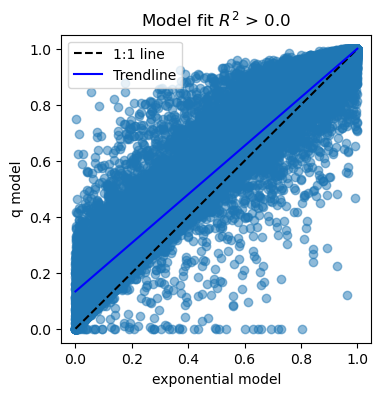

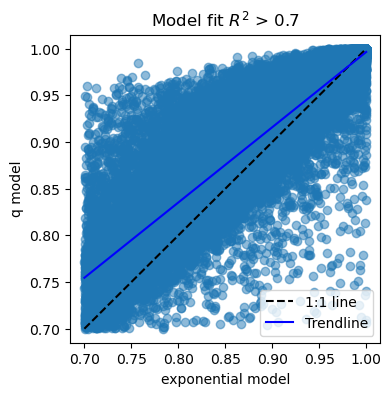

In [77]:
def plot_R2_models(R2_threshold, model1="exponential", model2 = "q"):
    # Assuming you have a DataFrame named 'df' with columns 'exp_r_squared' and 'q_r_squared'
    # Replace 'df' with your actual DataFrame name
    
    if model1 == "exponential":
        model1_name = "exp"
    else:
        model1_name = model1
        
    if model2 == "exponential":
        model2_name = "exp"
    else:
        model2_name = model2
        
    x = df[f'{model1_name}_r_squared'].values
    y = df[f'{model2_name}_r_squared'].values
    success_fit_idx = (x > R2_threshold) & (y > R2_threshold)

    # Create a scatter plot
    plt.figure(figsize=(4, 4))
    plt.scatter(x[success_fit_idx], y[success_fit_idx], alpha=0.5)  # alpha controls point transparency
    plt.title(f'Model fit $R^2$ > {R2_threshold}')
    plt.xlabel(f'{model1} model')
    plt.ylabel(f'{model2} model')
    plt.ylabel

    # Set the x and y-axis limits to the range [0.8, 1]
    plt.plot([R2_threshold, 1], [R2_threshold, 1], color='k', linestyle='--', label='1:1 line')

    # Add a trendline
    coefficients = np.polyfit(x[success_fit_idx], y[success_fit_idx], 1)
    trendline_x = np.array([R2_threshold, 1])
    trendline_y = coefficients[0] * trendline_x + coefficients[1]
    plt.plot(trendline_x, trendline_y, color='blue', label='Trendline')
    plt.legend()

plot_R2_models(R2_threshold=0.0)
plot_R2_models(R2_threshold=0.7)

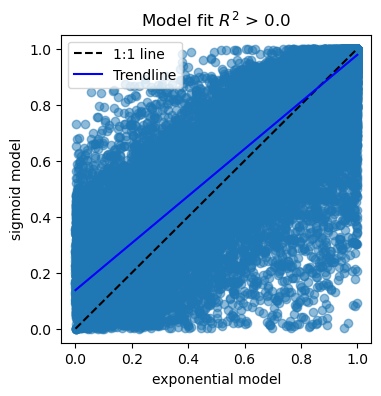

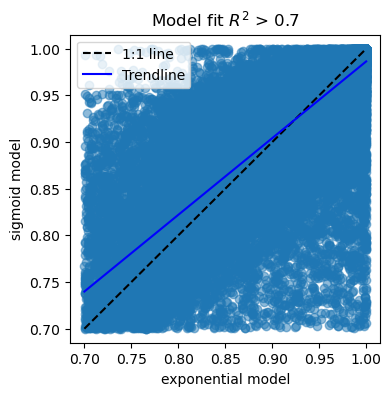

In [78]:
plot_R2_models(R2_threshold=0.0, model1="exponential", model2="sigmoid")
plot_R2_models(R2_threshold=0.7, model1="exponential", model2="sigmoid")

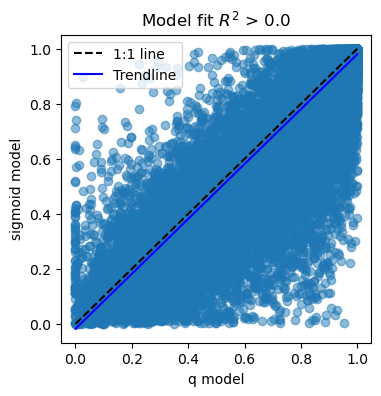

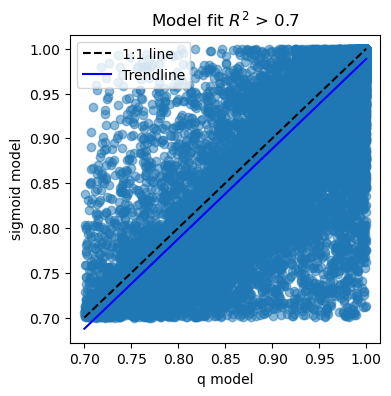

In [79]:
plot_R2_models(R2_threshold=0.0, model1="q", model2="sigmoid")
plot_R2_models(R2_threshold=0.7, model1="q", model2="sigmoid")

# Map plots

In [80]:
# Define the three colors in the colormap
import matplotlib.colors as mcolors
colors = ['#d8b365', '#f5f5f5', '#5ab4ac']

# Create a custom colormap
# cmap = mcolors.LinearSegmentedColormap.from_list('custom_BrBG', colors, N=256)
cmap = "BrBG"

In [81]:
def create_mean_dataarray(df=None, model_type=None, parameter=None):
    varname = f"{model_type}_{parameter}"
    mean_values = df.groupby(['latitude', 'longitude'])[varname].mean()
    data_array = mean_values.reset_index().pivot(index='latitude', columns='longitude', values=varname)
    return data_array

In [82]:
def plot_map(data_array=None, parameter=None, norm=None):
    # Create a figure and axes with Cartopy projection
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.PlateCarree()})

    # Create a grid of lat and lon coordinates
    lons, lats = np.meshgrid(data_array.columns, data_array.index)
    # Plot the heatmap using Cartopy
    im = ax.pcolormesh(lons, lats, data_array.values, norm=norm, cmap=cmap, transform=ccrs.PlateCarree(),) #, vmin=vmin, vmax=vmax)

    # Add coastlines
    ax.coastlines()

    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, orientation='vertical', label=f'Mean {parameter}')
    cbar.ax.set_position([0.92, 0.1, 0.02, 0.8])
    
    # Set plot title and labels
    ax.set_title(f'Mean {parameter} per pixel')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    plt.show()
    plt.tight_layout()

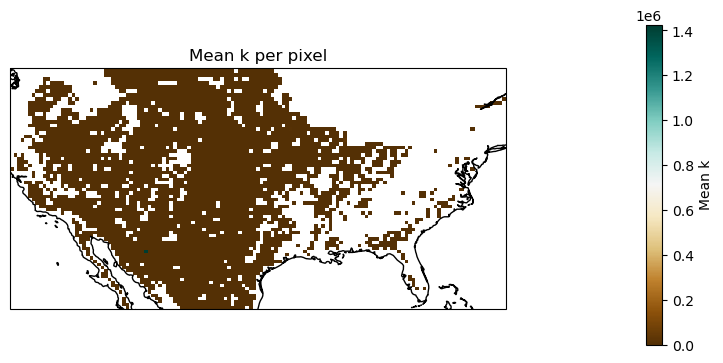

<Figure size 640x480 with 0 Axes>

In [83]:
da_k = create_mean_dataarray(df=filtered_df3, model_type="sigmoid", parameter="k")
plot_map(data_array=da_k, parameter="k")

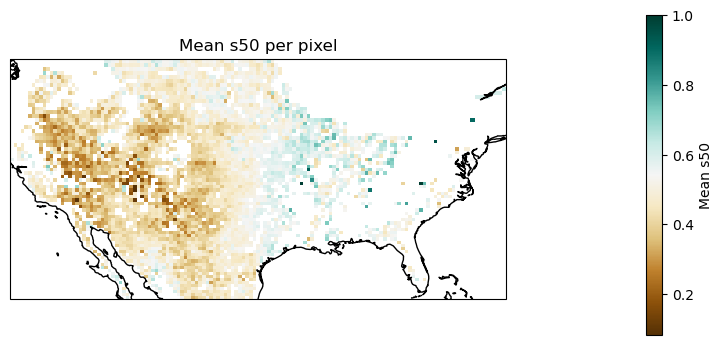

<Figure size 640x480 with 0 Axes>

In [94]:
da_k = create_mean_dataarray(df=filtered_df3, model_type="sigmoid", parameter="s50")
plot_map(data_array=da_k, parameter="s50")

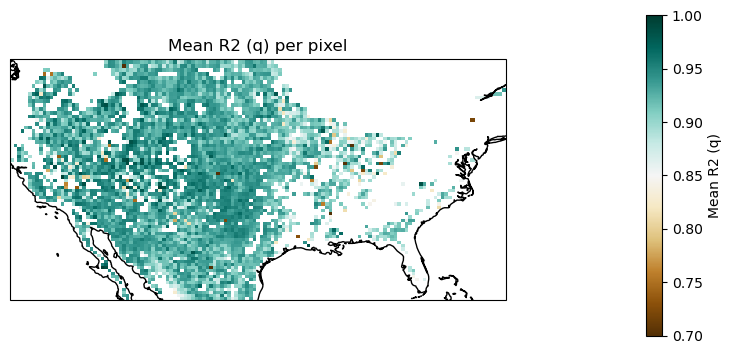

<Figure size 640x480 with 0 Axes>

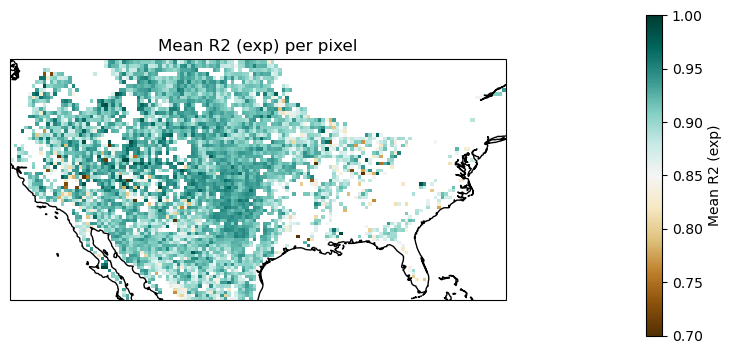

<Figure size 640x480 with 0 Axes>

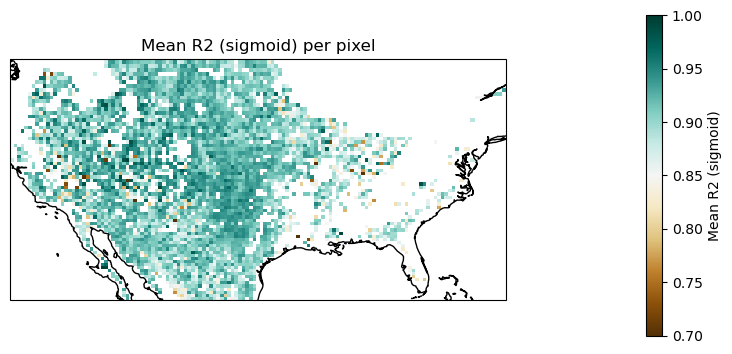

<Figure size 640x480 with 0 Axes>

In [84]:
norm = TwoSlopeNorm(vmin=0.7, vcenter=(0.7+1.0)/2, vmax=1.0)
da_R2_q = create_mean_dataarray(df=filtered_df2, model_type="q", parameter="r_squared")
plot_map(data_array=da_R2_q, parameter="R2 (q)", norm=norm)

da_R2_exp = create_mean_dataarray(df=filtered_df2, model_type="exp", parameter="r_squared")
plot_map(data_array=da_R2_exp, parameter="R2 (exp)", norm=norm)

da_R2_sigmoid = create_mean_dataarray(df=filtered_df3, model_type="sigmoid", parameter="r_squared")
plot_map(data_array=da_R2_exp, parameter="R2 (sigmoid)", norm=norm)

# norm = TwoSlopeNorm(vmin=0, vcenter=1, vmax=8)
# plot_map(data_array=da_q, parameter="q", norm=norm)

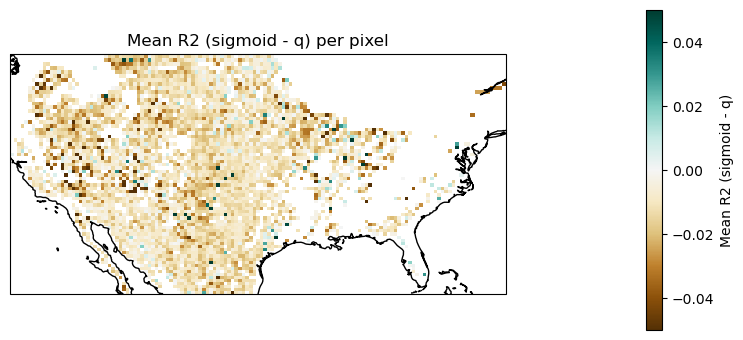

<Figure size 640x480 with 0 Axes>

In [85]:
norm = TwoSlopeNorm(vmin=-0.05, vcenter=0, vmax=0.05)
diff_R2 = create_mean_dataarray(df=filtered_df3, model_type="", parameter="diff_R2_sigmoid_q")
plot_map(data_array=diff_R2, parameter="R2 (sigmoid - q)", norm=norm)

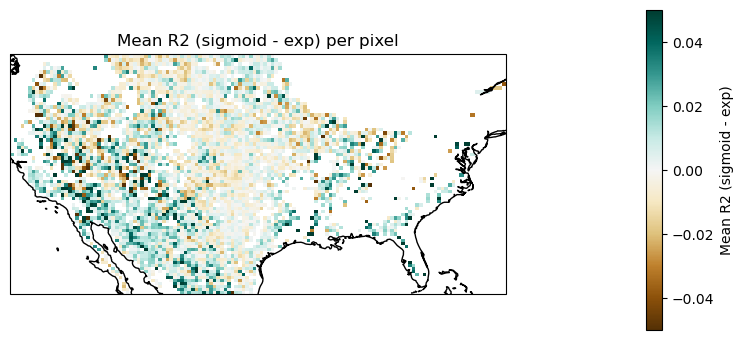

<Figure size 640x480 with 0 Axes>

In [86]:
diff_R2 = create_mean_dataarray(df=filtered_df3, model_type="", parameter="diff_R2_sigmoid_exp")
plot_map(data_array=diff_R2, parameter="R2 (sigmoid - exp)", norm=norm)

# Plot some events

In [87]:
from functions import q_drydown, exponential_drydown, loss_model, loss_sigmoid, loss_sigmoid2

In [88]:
event_id = 25
event = df.loc[event_id]

In [89]:
# Your input string
input_string =event.sm

# Replace '\n' with ' ' (space) to ensure all numbers are separated by spaces
input_string = input_string.replace('\n', ' np.nan')

# Replace ' nan' with ' np.nan' (with a space before np.nan) to ensure it's a valid NumPy nan value
input_string = input_string.replace(' nan', ' np.nan')

# Remove the square brackets at the beginning and end of the string
input_string = input_string.strip('[]')

# Convert the modified string to a NumPy array
sm = np.array([float(value) if value != 'np.nan' else np.nan for value in input_string.split()])



# Your input string

# Remove the square brackets and split the string into individual values
values = event.time.strip('[]').split()

# Convert the values to integers and create a NumPy array
t_d = np.array([int(value) for value in values])
t_d

import ast
def string_to_numpy_array(string):
    try:
        # Use ast.literal_eval to safely evaluate the string as a list
        return np.array(ast.literal_eval(string))
    except (SyntaxError, ValueError):
        return np.nan  # Return NaN if the string cannot be converted

n_days = (pd.to_datetime(event.event_end) - pd.to_datetime(event.event_start)).days

print(sm)


[0.18805772 0.17226552 0.15573542 0.14515999 0.13515209 0.11763361
        nan 0.09934253 0.09700954 0.1015693  0.10274603 0.08357332]


In [90]:
# Define variables 
theta = np.arange(0, 1, 0.01)
t = np.arange(0, n_days+1, 0.1)
# t_d = np.array([float(value) if value != 'np.nan' else np.nan for value in event.time.split()])
# t_h = pd.date_range(start=event.event_start, end=event.event_end, freq="H")

# Define parameters
k= event.q_k
q0 = 1
q = event.q_q
delta_theta = event.q_delta_theta
# q2 = 0.7
min_sm = event.min_sm
max_sm = event.max_sm



_exp_y_opt = np.array(ast.literal_eval(event.exp_y_opt)) # df['exp_y_opt'].apply(string_to_numpy_array)
exp_y_opt = (_exp_y_opt - min_sm)/(max_sm - min_sm)
_q_y_opt = np.array(ast.literal_eval(event.q_y_opt)) # df['q_y_opt'].apply(string_to_numpy_array)
q_y_opt = (_q_y_opt - min_sm)/(max_sm - min_sm)

exp_delta_theta = event.exp_delta_theta
theta_w = event.exp_theta_w
tau = event.exp_tau

norm_sm =  (sm-min_sm)/(max_sm-min_sm)


In [91]:
s50 = event.sigmoid_s50
k2 = event.sigmoid_k
ETmax2 = event.sigmoid_ETmax
_sigmoid_y_opt = np.array(ast.literal_eval(event.sigmoid_y_opt)) 
sigmoid_y_opt = (_sigmoid_y_opt - min_sm)/(max_sm - min_sm)
print(s50, k2, ETmax2)

0.6096381785548106 10.008310736887465 0.9786747876480212


In [92]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

# The differential equation dy/dt = f(y, a, b)
def loss_sigmoid(t, theta, s50, k, Emax, theta_wp=0.):
    d_theta = -1 * (Emax + theta_wp) / (1 + np.exp(-k * (theta - s50)))
    return d_theta

# Function to solve the DE with given parameters and return y at the time points
def solve_de(parameters):
    s50, k, Emax = parameters
    sol = solve_ivp(lambda t, theta: loss_sigmoid(t, theta, s50, k, Emax), [t_obs[0], t_obs[-1]], [y_init], t_eval=t_obs, vectorized=True)
    return sol.y.ravel()

# The objective function to minimize (sum of squared errors)
def objective_function(parameters):
    y_model = solve_de(parameters)
    error = y_obs - y_model
    return np.sum(error**2)

# Observed time series data
t_obs = t_d
y_obs = norm_sm[~np.isnan(norm_sm)]
y_init = y_obs[0]  # Initial condition (assuming that the first observed data point is the initial condition)

# Initial guess for parameters s50, k, Emax
initial_guess = [0.5, 10, 1.0]

# Perform the optimization
result = minimize(objective_function, initial_guess, method='L-BFGS-B')  # You can choose a different method if needed

# The result contains the optimized parameters
s50_best, k_best, Emax_best = result.x
print(f"Best parameters: s50 = {s50_best}, k = {k_best}, Emax = {Emax_best}")
best_solution = solve_ivp(lambda t, theta: loss_sigmoid(t, theta, s50_best, k_best, Emax_best), [t_obs[0], t_obs[-1]], [y_init], t_eval=t_obs)


Best parameters: s50 = 0.3393925775004543, k = 6.288087836568422, Emax = 0.06897144130392276


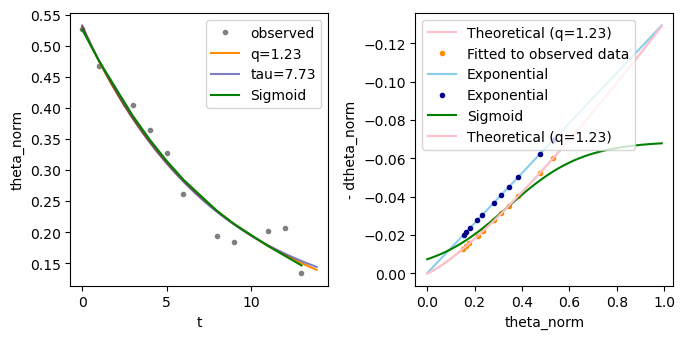

In [93]:
fig = plt.figure(figsize=(7,3.5))

# Calculate & plot the drawdown
ax1 = fig.add_subplot(1,2,1)


# Calculated drydown model

# Observed
ax1.plot(t_d, norm_sm[~np.isnan(norm_sm)],  '.', color='gray', label='observed')

# q model
ax1.plot(t, q_drydown(t=t, k=k, q=q, delta_theta=delta_theta), label=f'q={q:.2f}', color='darkorange')

# exponential
_exp = exponential_drydown(t, exp_delta_theta, theta_w, tau)
ax1.plot(t, (_exp-min_sm)/(max_sm - min_sm), label=f'tau={tau:.2f}', color='darkblue', alpha=0.5)

# sigmoid
ax1.plot(best_solution.t, best_solution.y[0], color='green', label='Sigmoid')

ax1.set_xlabel("t")
ax1.set_ylabel("theta_norm")
ax1.legend()
# ax2.set_ylim([0., 1])

# # Calculate & plot d_theta
d_theta = loss_model(theta, q, k, theta_wp=0., theta_star=1.)
d_theta_obs = loss_model(q_y_opt, q, k, theta_wp=0., theta_star=1.)
d_theta_exp = loss_model(theta, q=1, k=k, theta_wp=0., theta_star=1.)
d_theta_obs_exp = loss_model(exp_y_opt, q=1, k=k, theta_wp=0., theta_star=1.)

ax2 = fig.add_subplot(1,2,2)
ax2.plot(theta, d_theta, label=f'Theoretical (q={q:.2f})', color='pink')
ax2.plot(q_y_opt, d_theta_obs, '.', label=f'Fitted to observed data', color='darkorange')
ax2.plot(theta, loss_model(theta, q=1, k=k), label=f'Exponential', color='skyblue')
ax2.plot(exp_y_opt, d_theta_obs_exp, '.', label=f'Exponential', color='darkblue')
ax2.plot(theta, loss_sigmoid2(theta, s50_best, k_best, Emax_best), color='green', label='Sigmoid')
ax2.plot(theta, d_theta, label=f'Theoretical (q={q:.2f})', color='pink')
ax2.set_xlabel("theta_norm")
ax2.set_ylabel("- dtheta_norm")
ax2.invert_yaxis()
ax2.legend()

fig.tight_layout()